In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6
from datetime import datetime
data = pd.read_csv("C:\\Users\\Anurag sharma\\Desktop\\STUDY MAT & BOOKS\\3rd SEM\\TimeSeries\\AirPassengers.csv")
data.head()
#for i in range(len(data)):
    #data['Month'][i] = datetime.strptime(data['Month'][i], "%YM%m")

    
#data['Month'][0] = datetime.strptime(data['Month'][0], "%YM%m")




,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [2]:
data['Month'] = pd.to_datetime(data['Month'],infer_datetime_format=True)
indexeddata = data.set_index(['Month'])

In [3]:
from datetime import datetime
indexeddata.head(5)


,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


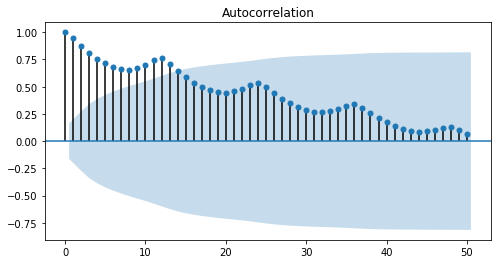

In [43]:
from statsmodels.graphics.tsaplots import plot_acf
rcParams['figure.figsize'] = 8,4
plot_acf(data['#Passengers'], lags=50)
plt.show()

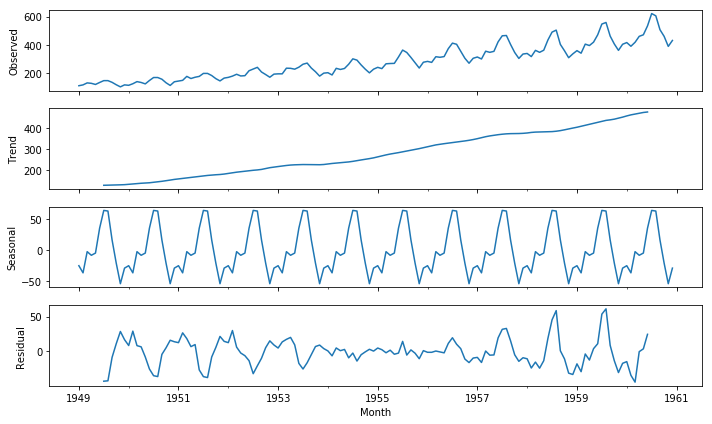

In [41]:
import statsmodels.api as sm
rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(indexeddata,model = 'additive')
fig = decomposition.plot()
plt.show()

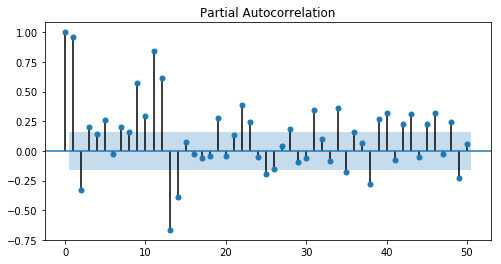

In [44]:
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 8,4
plot_pacf(data['#Passengers'], lags=50, method = 'ols')
plt.show()

In [7]:
#determining rolling statistic
rolmean = indexeddata.rolling(window=12).mean()

rolstd = indexeddata.rolling(window=12).std()
print(rolmean,rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
1949-06-01          NaN
1949-07-01          NaN
1949-08-01          NaN
1949-09-01          NaN
1949-10-01          NaN
1949-11-01          NaN
1949-12-01   126.666667
1950-01-01   126.916667
1950-02-01   127.583333
1950-03-01   128.333333
1950-04-01   128.833333
1950-05-01   129.166667
1950-06-01   130.333333
1950-07-01   132.166667
1950-08-01   134.000000
1950-09-01   135.833333
1950-10-01   137.000000
1950-11-01   137.833333
1950-12-01   139.666667
1951-01-01   142.166667
1951-02-01   144.166667
1951-03-01   147.250000
1951-04-01   149.583333
1951-05-01   153.500000
1951-06-01   155.916667
...                 ...
1958-07-01   376.333333
1958-08-01   379.500000
1958-09-01   379.500000
1958-10-01   380.500000
1958-11-01   380.916667
1958-12-01   381.000000
1959-01-01   382.666667
1959-02-01   384.666667
1959-03-01   388

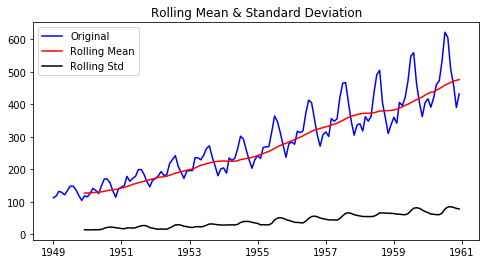

In [45]:
#plot rolling statistics:
orig = plt.plot(indexeddata, color= 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'black', label= 'Rolling Std')
rcParams['figure.figsize'] = 10,5
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block= False)

In [9]:
import statsmodels
from statsmodels.tsa.stattools import adfuller
print ("Results of Dickey-Fuller Test:")
dftest = adfuller(indexeddata['#Passengers'], autolag= 'AIC')
dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    #print (key,value)
    dfoutput['Critical Value(%s)'%key] = value
print(dfoutput)

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value(1%)              -3.481682
Critical Value(5%)              -2.884042
Critical Value(10%)             -2.578770
dtype: float64


# P-Value is 0.99 and critical value & critical value is less than test statistics . Therefore, Time Series is not stationary

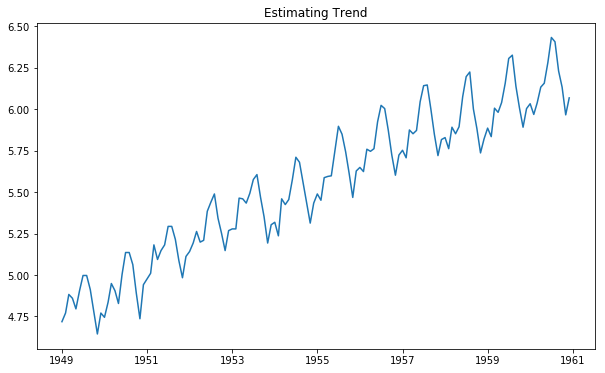

In [47]:
indexeddata_log = np.log(indexeddata)
rcParams['figure.figsize'] = 10,6
plt.title("Estimating Trend")
plt.plot(indexeddata_log)

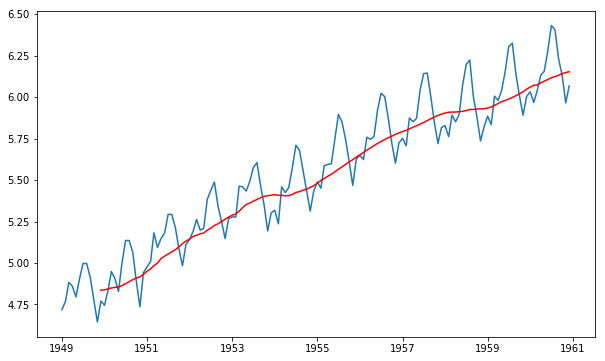

In [48]:
moving_avg = indexeddata_log.rolling(window=12).mean()
moving_std = indexeddata_log.rolling(window=12).std()
rcParams['figure.figsize'] = 10,6
plt.plot(indexeddata_log)
plt.plot(moving_avg, color= 'red')

# Still the trend is upward trend , data is still not stationary.

In [12]:
indexeddata_log_minus_ma = indexeddata_log - moving_avg
indexeddata_log_minus_ma.head(12)

#removing nan values
indexeddata_log_minus_ma.dropna(inplace=True)
indexeddata_log_minus_ma.head(10)




,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [49]:
def test_stationary(timeseries):
    
    #determining rolling statistics
    moving_avg = timeseries.rolling(window=12).mean()
    moving_std = timeseries.rolling(window=12).std()
    
    #plotting rolling statistics
    orig = plt.plot(timeseries, color= 'blue', label = 'Original')
    mean = plt.plot(moving_avg, color = 'red', label = 'Rolling Mean')
    std = plt.plot(moving_std, color= 'black', label= 'Rolling Std')
    rcParams['figure.figsize'] = 10,6
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block= False)
    
    #performing Dickey-Fuller test:
    import statsmodels
    from statsmodels.tsa.stattools import adfuller
    print ("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries['#Passengers'], autolag= 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic','p-value','#lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
    #print (key,value)
        dfoutput['Critical Value(%s)'%key] = value
    print(dfoutput)
    
    
    

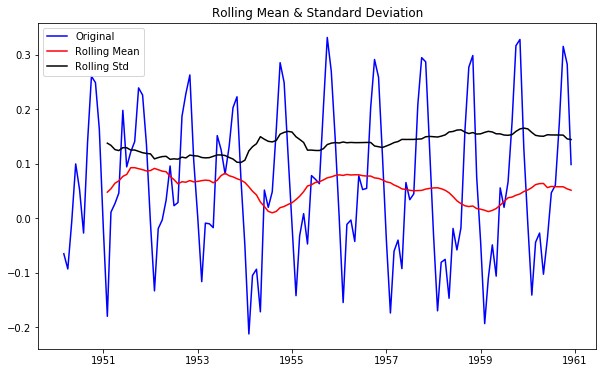

Results of Dickey-Fuller Test:
Test Statistic                  -3.170896
p-value                          0.021732
#lags Used                      13.000000
Number of Observations Used    116.000000
Critical Value(1%)              -3.488022
Critical Value(5%)              -2.886797
Critical Value(10%)             -2.580241
dtype: float64


In [50]:
test_stationary(indexeddata_log_minus_ma)

# There is no trend. Here p-value is 0.02 . Therefore the time series is stationary.

# Applying differencing

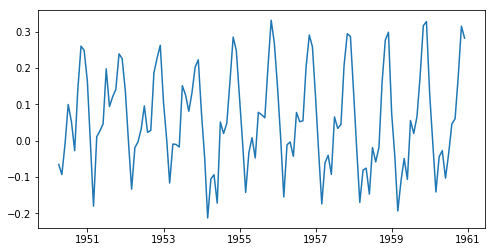

In [51]:
indexeddata_log_minus_ma = indexeddata_log_minus_ma.shift(1)
rcParams['figure.figsize'] = 8,4
indexeddata_log_minus_ma.dropna(inplace = True)
plt.plot(indexeddata_log_minus_ma)


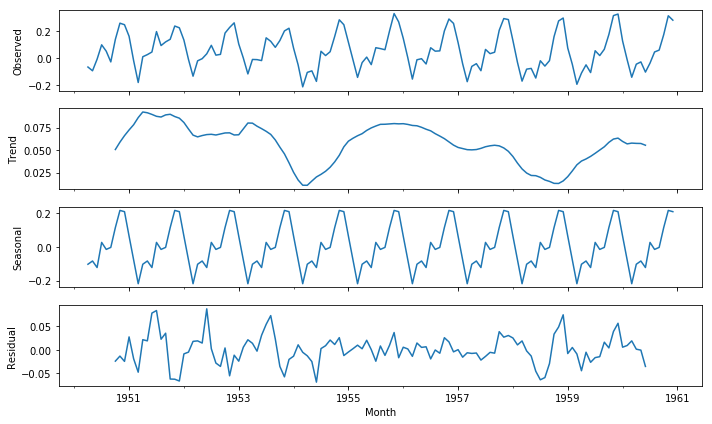

In [52]:
import statsmodels.api as sm
rcParams['figure.figsize'] = 10,6
decomposition = sm.tsa.seasonal_decompose(indexeddata_log_minus_ma,model = 'additive')
fig = decomposition.plot()
plt.show()

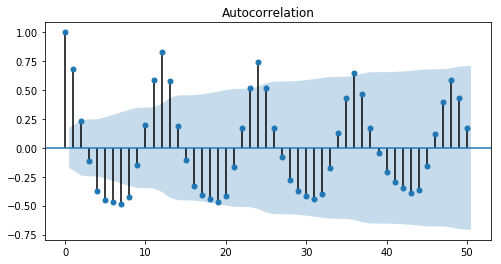

In [53]:
from statsmodels.graphics.tsaplots import plot_acf
rcParams['figure.figsize'] = 8,4
plot_acf(indexeddata_log_minus_ma['#Passengers'], lags=50)
plt.show()

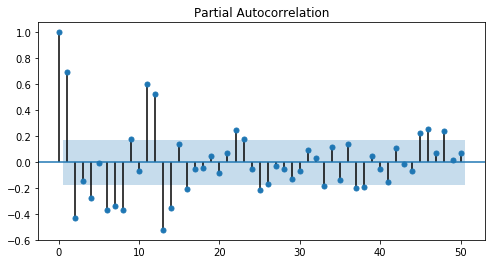

In [54]:
from statsmodels.graphics.tsaplots import plot_pacf
rcParams['figure.figsize'] = 8,4
plot_pacf(indexeddata_log_minus_ma['#Passengers'], lags=50, method = 'ols')
plt.show()

(128,)
Plotting AR model


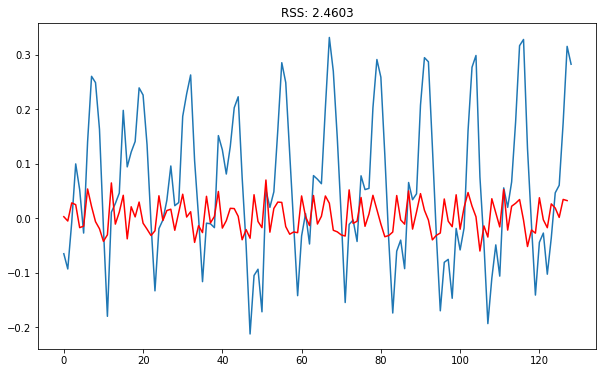

In [56]:
#ARIMA MODEL
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.arima_model import ARMAResults
from sklearn.metrics import mean_squared_error
model = ARIMA(indexeddata_log_minus_ma['#Passengers'].values, order=(0,1,1))
results_AR = model.fit(disp=-1)
rcParams['figure.figsize'] = 10,6
plt.plot(indexeddata_log_minus_ma['#Passengers'].values)
print(results_AR.fittedvalues.shape)
plt.plot(results_AR.fittedvalues,color = 'red')
error = sum((results_AR.fittedvalues-indexeddata_log_minus_ma['#Passengers'][0:128])**2)
plt.title('RSS: %.4f'% error)
print('Plotting AR model')


In [63]:
print(ARMAResults.summary(results_AR))


                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  128
Model:                 ARIMA(0, 1, 1)   Log Likelihood                 110.168
Method:                       css-mle   S.D. of innovations              0.102
Date:                Mon, 11 Nov 2019   AIC                           -214.335
Time:                        16:07:00   BIC                           -205.779
Sample:                             1   HQIC                          -210.859
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0025      0.012      0.215      0.830      -0.020       0.025
ma.L1.D.y      0.2793      0.104      2.693      0.008       0.076       0.483
                                    Roots           

In [57]:
from pyramid.arima import auto_arima
stepwise_model = auto_arima(indexeddata_log_minus_ma, start_p=1, start_q=1,
                           max_p=5, max_q=5, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-424.344, BIC=-410.576, Fit time=1.890 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=-388.922, BIC=-383.415, Fit time=0.132 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=-419.605, BIC=-408.591, Fit time=0.774 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=-424.897, BIC=-413.883, Fit time=1.350 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=-423.235, BIC=-409.467, Fit time=1.828 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=-402.542, BIC=-394.281, Fit time=0.227 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=-403.955, BIC=-390.187, Fit time=4.681 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=-422.873, BIC=-406.352, Fit time=4.553 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 12); AIC=-410.840, BIC=-402.579, Fit time=1.537 seconds
Fit ARIMA: order=(0, 1, 2) s

In [58]:
print(stepwise_model.aic())

-424.8974004524335


In [59]:
#Yule-Walker equations
from statsmodels.regression.linear_model import yule_walker
rho, sigma = sm.regression.yule_walker(indexeddata_log_minus_ma, order=5,method="mle")

In [60]:
rho

array([ 0.87870637, -0.38175501,  0.11039818, -0.24571578, -0.02068631])

In [61]:
sigma

0.08520284056075078